## DNN  
- 입력층과 출력층 사이에 여러 개의 은닉층들로 아뤄진 인공 신경망
- 입력층 : 네트워크의 입력 부분으로, 학습 시키고 싶은 x 값
- 은닉층 : 입력층과 출력층을 제외한 


## 역전파
순전파와는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트

## 손실함수
가중치에 따라 오차가 얼마나 커지거나 작아지는 가를 평가
- 평균 제곱 오차 : 실제 값과 추정 값과의 차이를 나타내며 회귀 문제에 사용됨
- 교차 엔트로피 함수 : 두 분포 간의 차이를 나타내는 척도로서 분류 문제에 많이 사용됨

### 단순 선형 회귀

In [4]:
# 라이브러리 업데이트
!pip install --upgrade tensorflow

!pip install numpy

!pip install scikit-video

!git clone https://github.com/drminix/first-order-model

%cd /content/first-order-model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 1.7 MB 43.6 MB/s 
     |████████████████████████████████| 439 kB 75.5 MB/s 
     |████████████████████████████████| 6.0 MB 73.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
# 드라이브 연결
from google.colab import drive

drive.mount('/content/gdrive')
target_folder = '/content/gdirve'

In [21]:
# 데이터 준비 - 단순한 데이터 만들기
import numpy as np

X = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

print(X.shape, y.shape)

(6,) (6,)


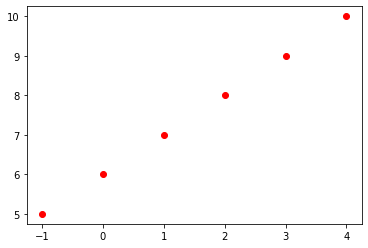

In [5]:
# 데이터 시각화 - 산점도를 그려서 데이터의 분포를 확인한다.
import matplotlib.pyplot as plt

plt.plot(X, y, 'ro')
plt.show()

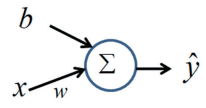

In [11]:
# 모델 만들기 - 케라스를 사용해서 모델을 Unit이 1개인 모델을 만든다.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 순차적으로 모델을 쌓을거기 때문에 sequential로 간다.
model = keras.Sequential([layers.Dense(1, input_shape=(1,)),])

# 모델을 요약해서 보여준다.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 컴파일 - 손실함수와 옵티마이저 그리고 메트릭스를 설정한다.
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [13]:
# 학습 - 에포크, 배치 사이즈등을 설정해서 학습을 진행한다.
# epoch : 얼마나 많이 돌릴거냐 (과적합이 발생하면 오히려 안돌린거 보다 못할 수 있다.)
history = model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 0s 317ms/step - loss: 99.8396 - mae: 9.2717
Epoch 2/30
1/1 [==============================] - 0s 17ms/step - loss: 81.0765 - mae: 8.4782
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 66.2626 - mae: 7.7717
Epoch 4/30
1/1 [==============================] - 0s 9ms/step - loss: 54.5570 - mae: 7.1425
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 45.2977 - mae: 6.5818
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 37.9642 - mae: 6.0819
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 32.1468 - mae: 5.6361
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 27.5231 - mae: 5.2381
Epoch 9/30
1/1 [==============================] - 0s 11ms/step - loss: 23.8396 - mae: 4.8826
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 20.8967 - mae: 4.5648
Epoch 11/30
1/1 [==============================] - 0s 10ms/step - los

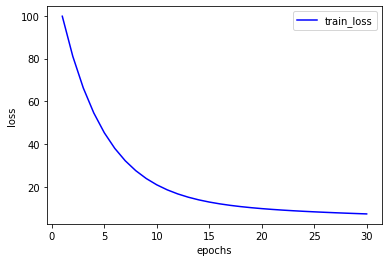

In [15]:
# 학습 결과의 시각화
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, color='blue', label='train_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
# 예측하기 - 학습 완료된 모델에 새로운 데이터를 입력해서 예측한다.
# 10을 예측했는데 22가 결과로 나온다 정확한 값을 예측한게 아님
# 예측값을 정확하게 하기 위해선 가중치를 줘야함
X_test = [[10.0]]

y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 0s 110ms/step
[[22.76617]]


In [18]:
# 가중치 출력
w, b = model.get_weights()

print('w:', w)
print('b:', b)

w: [[2.03131]]
b: [2.4530694]


In [27]:
# 예측값의 시각화
y_pred = model.predict([[-1], [0], [1], [2], [3], [4]])
y_pred

1/1 [==============================] - 0s 46ms/step


array([[ 0.42175937],
       [ 2.4530694 ],
       [ 4.48438   ],
       [ 6.51569   ],
       [ 8.547     ],
       [10.57831   ]], dtype=float32)

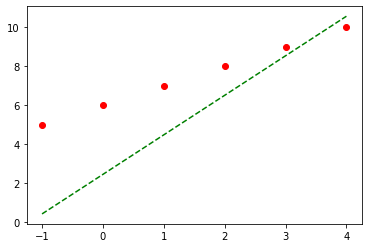

In [28]:
plt.plot(X, y, 'ro')
plt.plot(X, y_pred, 'g--')

plt.show()

### 다중 선형회귀
Auto Mpg 데이터를 사용해서 연비 데이터를 예측하는 모델을 학습하는 과정을 확인한다.

In [29]:
# 데이터 준비 - 연비 데이터를 읽어들여서 데이터 프레임을 만든다.
import pandas as pd

# value 값이 없는 애들은 ?를 찍어서 가져와라
mpg = pd.read_csv('/content/auto-mpg.csv', na_values="?")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [30]:
# 데이터 정보 확인
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [31]:
# 결측치 확인 - 결측치의 갯수를 확인한다.
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [32]:
df = mpg[mpg['horsepower'].isnull()]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [35]:
# 결측치 처리 - 결측치를 포함한 행을 삭제한 후 확인한다.
mpg = mpg.dropna()
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [36]:
# 특성과 레이블 분리 - 특성 데이터로 사용할 컬럼 데이터만 추출한다.
X_data = mpg.drop(['mpg', 'car name'], axis=1)
X_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [37]:
y_data = mpg['mpg']
y_data.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [38]:
# 테스트 데이터 분리
from sklearn.model_selection import train_test_split

# 20%는 테스트하기 위해 랜덤하게 분리해준다.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 7) (79, 7)
(313,) (79,)


In [39]:
# 데이터 정규화
# 원본 데이터는 데이터의 고유의 특성과 분포를 가지고 있는데 이를 그대로 사용하면 학습이 느리거나 문제가 발생한다.
# Scaler을 이용하여 동일하게 일정 범위로 스케일링 하는 것이 필요하다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[ 0.30486156  0.28457757  0.14142863  0.75480297  1.1217589   0.49452752
  -0.68982474]
 [-0.87318372 -0.53588042 -0.32949862 -0.49312922 -0.22893966 -0.0572982
  -0.68982474]
 [ 0.30486156 -0.23665456 -0.19868549 -0.00252992 -0.37111846 -0.33321105
  -0.68982474]
 [ 1.48290683  1.18225513  1.18793363  1.3680521  -0.72656545 -1.16094962
  -0.68982474]
 [-0.87318372 -1.05711255 -1.06205212 -1.32309939  0.30423083  1.32226608
  -0.68982474]]


In [40]:
# 넘파이 배열로 변환
y_train = y_train.values
y_test = y_test.values

print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [46]:
# 모델 만들기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(7,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                512       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 모델의 컴파일 - 모델의 입력 데이터로 사용하기 위해서 넘파이의 ndarray 타입으로 변경한다.
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [50]:
# 모델 학습
# layer을 하나 더 늘려서 학습을 진행시키면 loss값이 떨어질 수 도 있다.
EPOCHS = 200
BATCH_SIZE = 32
history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/200
8/8 [==============================] - 0s 28ms/step - loss: 4.2264 - mae: 1.3574 - mse: 4.2264 - val_loss: 6.9033 - val_mae: 1.9039 - val_mse: 6.9033
Epoch 2/200
8/8 [==============================] - 0s 14ms/step - loss: 4.1677 - mae: 1.3747 - mse: 4.1677 - val_loss: 6.3174 - val_mae: 1.8407 - val_mse: 6.3174
Epoch 3/200
8/8 [==============================] - 0s 14ms/step - loss: 4.2006 - mae: 1.3786 - mse: 4.2006 - val_loss: 7.0179 - val_mae: 1.9157 - val_mse: 7.0179
Epoch 4/200
8/8 [==============================] - 0s 11ms/step - loss: 4.1647 - mae: 1.3669 - mse: 4.1647 - val_loss: 6.7796 - val_mae: 1.9049 - val_mse: 6.7796
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 4.1730 - mae: 1.3524 - mse: 4.1730 - val_loss: 7.0402 - val_mae: 1.9208 - val_mse: 7.0402
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 4.1275 - mae: 1.3522 - mse: 4.1275 - val_loss: 6.4733 - val_mae: 1.8504 - val_mse: 6.4733
Epoch 7/200
8/8 [=============

In [51]:
# history 객체 - 저장된 데이터 키를 확인한다.
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [52]:
# 학습 곡선
import matplotlib.pyplot as plt

def plot_history(history):
 hist = pd.DataFrame(history.history)
 hist['epoch'] = history.epoch

 plt.figure(figsize=(16,8))
 plt.subplot(1,2,1)
 plt.xlabel('Epoch')
 plt.ylabel('Mean Abs Error [MPG]')
 plt.plot(hist['epoch'], hist['mae'], label='Train Error')
 plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
 plt.ylim([0,5])
 plt.legend()
 
 plt.subplot(1,2,2)
 plt.xlabel('Epoch')
 plt.ylabel('Mean Square Error [$MPG^2$]')
 plt.plot(hist['epoch'], hist['mse'], label='Train Error')
 plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
 plt.ylim([0,20])
 plt.legend()
 plt.show()

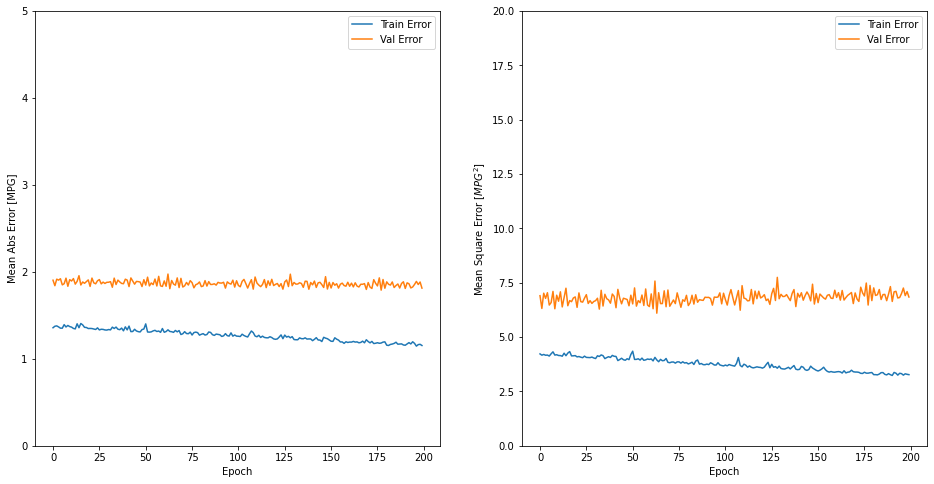

In [53]:
plot_history(history)

In [54]:
# 평가
loss, mae, mse = model.evaluate(X_test_s, y_test, verbose=2)

3/3 - 0s - loss: 6.5536 - mae: 1.8977 - mse: 6.5536 - 28ms/epoch - 9ms/step


In [55]:
# 예측
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 4ms/step


array([[25.449293 ],
       [23.304703 ],
       [34.24737  ],
       [23.092428 ],
       [26.509634 ],
       [29.593054 ],
       [12.4615555],
       [30.973246 ],
       [19.346972 ],
       [31.194738 ],
       [14.405889 ],
       [22.058245 ],
       [15.79635  ],
       [28.46743  ],
       [17.612246 ],
       [27.480898 ],
       [19.565668 ],
       [33.547813 ],
       [28.445292 ],
       [29.22182  ],
       [19.468136 ],
       [48.712437 ],
       [35.54129  ],
       [17.826466 ],
       [30.091984 ],
       [25.736368 ],
       [16.611698 ],
       [17.480757 ],
       [30.09159  ],
       [21.643427 ],
       [13.985473 ],
       [20.119083 ],
       [18.231394 ],
       [34.58031  ],
       [13.148066 ],
       [36.36164  ],
       [13.125699 ],
       [24.189272 ],
       [12.707014 ],
       [ 9.212585 ],
       [14.871082 ],
       [28.219973 ],
       [35.830025 ],
       [26.85442  ],
       [14.717313 ],
       [12.158726 ],
       [17.873192 ],
       [32.80

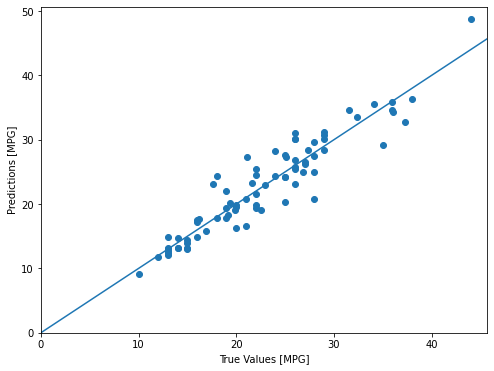

In [56]:
# 예측 결과 시각화
y_pred = y_pred.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)

plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

plt.plot([-100, 100], [-100, 100])
plt.show()

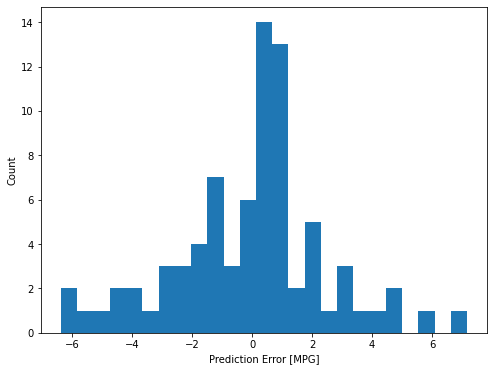

In [58]:
# 오차 시각화
error = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

### 이진 분류(Binary Classification)
피마 인디언 데이터를 사용해서 당뇨병 이진분류를 실행하는 과정

In [59]:
import pandas as pd

diabetes = pd.read_csv('/content/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
# 결측치 확인
diabetes.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
# 이상치 확인
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(diabetes[cols]==0).sum(axis=0)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

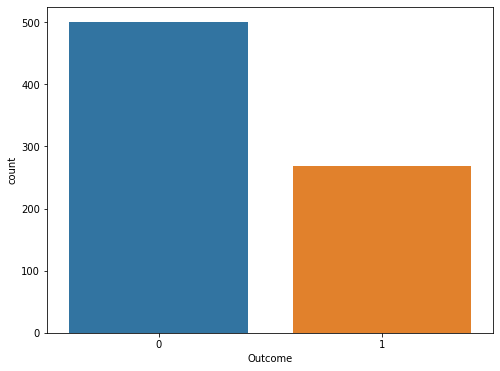

In [66]:
# 데이터 시각화 - 당뇨병 환자와 정상인의 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data = diabetes)
plt.show()

In [67]:
# 범주별 데이터 수
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [68]:
# 특성과 레이블 분리
X_data = diabetes.drop(['Outcome'], axis=1)
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [69]:
y_data = diabetes['Outcome']
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [70]:
# 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,# 보통은 8:2 많게는 7:3으로 잡는다.
                                                    random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [72]:
# 이상치 처리 - 앞 단계에서 확인했던 이상치를 해결하기 위해 평균을 적용한다.
import numpy as np

def impute_zero(data, col):

  df = data.loc[data[col] != 0, col]
  avg = np.sum(df) / len(df)
  k = len(data.loc[ data[col] == 0, col]) 
  data.loc[ data[col] == 0, col ] = avg
  print('%s : fixed %d, mean: %.3f' % (col, k, avg))

for col in cols:
  impute_zero(X_train, col)

Glucose : fixed 5, mean: 121.847
BloodPressure : fixed 24, mean: 72.239
SkinThickness : fixed 176, mean: 28.596
Insulin : fixed 290, mean: 154.330
BMI : fixed 7, mean: 32.352


In [73]:
# 이상치 확인
(X_train[cols] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [74]:
# 테스트 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

print(X_train_s[:5])

[[-5.26396861e-01 -1.25832567e+00  0.00000000e+00  4.22787785e-16
   0.00000000e+00  1.02533391e-15 -4.90734790e-01 -1.03594038e+00]
 [ 1.58804586e+00 -3.27397242e-01  8.07407436e-01 -5.46930179e-01
   0.00000000e+00 -5.99178052e-01  2.41502991e+00  1.48710085e+00]
 [-8.28460107e-01  5.70283740e-01 -2.17042447e+00 -1.14195109e+00
  -8.20791983e-01 -5.27026593e-01  5.49160552e-01 -9.48938958e-01]
 [-1.13052335e+00  1.30172750e+00 -1.83955426e+00  4.22787785e-16
   0.00000000e+00 -1.50828644e+00 -6.39291267e-01  2.79212217e+00]
 [ 6.81856121e-01  4.04046521e-01  6.41972330e-01  1.00012419e+00
   2.48169622e+00  1.99827450e+00 -6.86829340e-01  1.13909516e+00]]


In [75]:
# 넘파이 배열로 타입 변경 - 이상치 확인
y_train = y_train.values
y_test = y_test.values

print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [76]:
# 모델 만들기
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(12, input_dim=8, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid')) # 결과값이 나오는 것을 sigmoid라고 한다.

  return model

In [77]:
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 12)                108       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [82]:
# 마지막 epoch의 loss가 최종값이 아니다 -> 무조건 학습 곡선 그려보기
EPOCHS = 700
BATCH_SIZE = 16
history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/700
31/31 [==============================] - 0s 5ms/step - loss: 0.1700 - acc: 0.9369 - val_loss: 0.8851 - val_acc: 0.7154
Epoch 2/700
31/31 [==============================] - 0s 3ms/step - loss: 0.1685 - acc: 0.9409 - val_loss: 0.8817 - val_acc: 0.7154
Epoch 3/700
31/31 [==============================] - 0s 3ms/step - loss: 0.1684 - acc: 0.9430 - val_loss: 0.8843 - val_acc: 0.7154
Epoch 4/700
31/31 [==============================] - 0s 3ms/step - loss: 0.1691 - acc: 0.9409 - val_loss: 0.8827 - val_acc: 0.7154
Epoch 5/700
31/31 [==============================] - 0s 3ms/step - loss: 0.1694 - acc: 0.9430 - val_loss: 0.8890 - val_acc: 0.7236
Epoch 6/700
31/31 [==============================] - 0s 3ms/step - loss: 0.1685 - acc: 0.9409 - val_loss: 0.8858 - val_acc: 0.7154
Epoch 7/700
31/31 [==============================] - 0s 4ms/step - loss: 0.1687 - acc: 0.9409 - val_loss: 0.8868 - val_acc: 0.7154
Epoch 8/700
31/31 [==============================] - 0s 4ms/step - loss: 0.1675 - a

In [85]:
# 학습 곡선
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
  plt.legend()

  plt.show()

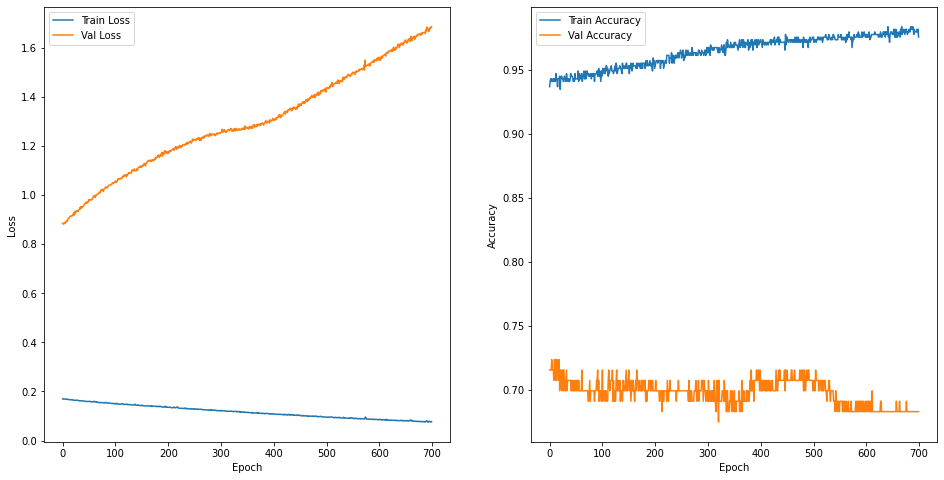

In [86]:
# val_loss가 올라가는 이유 sigmoid이기 때문이다.
plot_history(history)

### 콜백 함수

In [84]:
# 모델 생성과 컴파일
from tensorflow import keras

model = build_model()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [87]:
# 정보 확인 - 학습이 진척이 없을 때 조기 종료하는 기능
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10)

In [88]:
# 학습 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

EPOCHS = 500
BATCH_SIZE = 16
history = model.fit(X_train_s, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split = 0.2, 
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/500
31/31 [==============================] - 3s 9ms/step - loss: 0.7770 - acc: 0.3727 - val_loss: 0.7228 - val_acc: 0.4146
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6985 - acc: 0.4908 - val_loss: 0.6706 - val_acc: 0.5691
Epoch 3/500
31/31 [==============================] - 0s 4ms/step - loss: 0.6452 - acc: 0.6802 - val_loss: 0.6304 - val_acc: 0.7073
Epoch 4/500
31/31 [==============================] - 0s 4ms/step - loss: 0.6050 - acc: 0.7230 - val_loss: 0.5937 - val_acc: 0.7236
Epoch 5/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5697 - acc: 0.7454 - val_loss: 0.5618 - val_acc: 0.7317
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5416 - acc: 0.7454 - val_loss: 0.5364 - val_acc: 0.7480
Epoch 7/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5176 - acc: 0.7556 - val_loss: 0.5177 - val_acc: 0.7642
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5003 - a

In [89]:
# 예측
y_pred = model.predict(X_test_s)
y_pred

5/5 [==============================] - 0s 3ms/step


array([[4.4522846e-01],
       [3.6766984e-02],
       [2.7039342e-02],
       [1.9826294e-01],
       [3.5542831e-01],
       [4.6400258e-01],
       [1.6676291e-03],
       [6.1602777e-01],
       [7.3340631e-01],
       [5.2485746e-01],
       [5.9148777e-02],
       [7.7785814e-01],
       [3.7116536e-01],
       [3.7596005e-01],
       [3.4778263e-02],
       [4.5001438e-01],
       [3.4936696e-02],
       [3.5927899e-02],
       [6.6509032e-01],
       [6.0208791e-01],
       [2.1655166e-01],
       [4.4065706e-02],
       [9.3380034e-02],
       [3.7041064e-02],
       [5.1353335e-01],
       [9.1288918e-01],
       [3.7483461e-02],
       [6.0010469e-03],
       [4.8150569e-02],
       [1.5613876e-01],
       [8.6638421e-01],
       [7.7330971e-01],
       [8.2394850e-01],
       [8.3867854e-01],
       [8.3445179e-01],
       [7.3668438e-01],
       [8.9355153e-01],
       [2.7334130e-01],
       [2.4697579e-01],
       [4.0542528e-01],
       [2.6986390e-02],
       [5.861614

In [90]:
# 예측 결과 확인
y_pred = (y_pred > 0.5).astype(np.int32).flatten()
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

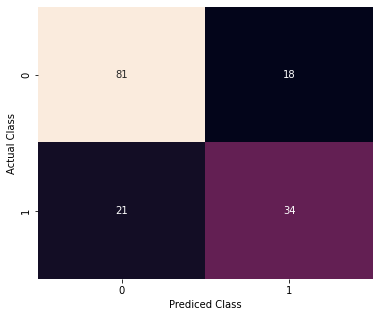

In [91]:
# confusion metrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Prediced Class')
plt.show()

### 다중 분류(Multi-class Classification)
펭귄 데이터를 사용해서 펭귄의 종류를 분류하는 다중 분류 모델을 학습시키는 방법을 확인

In [95]:
# 데이터 준비
import pandas as pd

penguins = pd.read_csv('/content/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [96]:
# 펭귄의 종류 확인
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [97]:
# 데이터 정보 확인
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [98]:
# 결측치 확인
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [99]:
# 결측치 처리
penguins = penguins.dropna()
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [100]:
# 속성과 레이블 분리
X = penguins.drop(['species'], axis=1)
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [101]:
# 레이블 데이터 분리
y = penguins['species']
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [102]:
# 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(266, 6) (266,)
(67, 6) (67,)


In [103]:
# 학습에 사용할 컬럼 추출
df = X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
230,40.9,13.7,214.0,4650.0
84,37.3,17.8,191.0,3350.0
303,50.0,15.9,224.0,5350.0
22,35.9,19.2,189.0,3800.0
29,40.5,18.9,180.0,3950.0


In [104]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_s = scaler.fit_transform(df)
df_s

array([[0.32      , 0.07142857, 0.71186441, 0.54166667],
       [0.18909091, 0.55952381, 0.3220339 , 0.18055556],
       [0.65090909, 0.33333333, 0.88135593, 0.73611111],
       ...,
       [0.27636364, 0.54761905, 0.3559322 , 0.13888889],
       [0.48727273, 0.22619048, 0.81355932, 0.63888889],
       [0.21818182, 0.46428571, 0.15254237, 0.13194444]])

In [105]:
# 데이터 프레임 생성
dfx = pd.DataFrame(df_s,
                   columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

dfx.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.320000,0.071429,0.711864,0.541667
1,0.189091,0.559524,0.322034,0.180556
2,0.650909,0.333333,0.881356,0.736111
3,0.138182,0.726190,0.288136,0.305556
4,0.305455,0.690476,0.135593,0.347222


In [106]:
# 레이블 인코딩
dfx['island'] = X_train['island'].map(
    {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
).reset_index(drop = True)

dfx.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island
0,0.320000,0.071429,0.711864,0.541667,0
1,0.189091,0.559524,0.322034,0.180556,1
2,0.650909,0.333333,0.881356,0.736111,0
3,0.138182,0.726190,0.288136,0.305556,0
4,0.305455,0.690476,0.135593,0.347222,0


In [108]:
dfy = y_train.map(
    {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
).reset_index(drop = True)

dfy

0      2
1      0
2      2
3      0
4      0
      ..
261    1
262    0
263    0
264    2
265    0
Name: species, Length: 266, dtype: int64

In [112]:
# 원 - 핫 인코딩 : 다중분류 모델의 학습을 위해서 타깃 데이터를 원 - 핫 인코딩한다.
from tensorflow.keras import utils

y_train = utils.to_categorical(dfy)
y_train[:20]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [114]:
# 모델 만들기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(6,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax'), # 다중 분류
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                224       
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 3)                 27        
                                                                 
Total params: 915
Trainable params: 915
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
              optimzer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델의 학습
EPOCHS = 50
BATCH_SIZE = 32
histroy = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

In [ ]:
# 학습 곡선
plot_history(history)

In [ ]:
# 테스트 데이터 처리하기
df = X_test[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

df.head()

In [ ]:
df_s = scaler.transform(df)
df_s[:10]

In [ ]:
# 데이터 프레임 생성
dfx = pd.DataFrame(df_s, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

dfx.head()

In [ ]:
# 데이터 인코딩
dfx['island'] = X_test['island'].map(
    {'Biscoe': 0, 'Dream': 1, 'Torgensen': 2}
).reset_index(drop = True)

dfx['sex'] = X_test['sex'].map(
    {'FEMALE': 0, 'MALE': 1}
).reset_index(drop = True)

dfx.head(10)

In [ ]:
# 타깃 데이터 인코딩
dfy = y_test.map(
    {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
).reset_index(drop = True)

dfy

In [ ]:
X_test = dfx.values
y_test = dfy.values

X_test = X_test.astype('float32')

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred[:5]

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

In [ ]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()